In [2]:
import nltk
import urllib
import bs4 as bs
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
link = ['https://www.polagoclothing.com/collections/maxis',
        'https://www.polagoclothing.com/collections/maxis?page=2',
        'https://www.polagoclothing.com/collections/maxis?page=3'
       , 'https://www.polagoclothing.com/collections/maxis?page=4',
        'https://www.polagoclothing.com/collections/maxis?page=5'
       , 'https://www.polagoclothing.com/collections/maxis?page=6',
        'https://www.polagoclothing.com/collections/maxis?page=7'
       , 'https://www.polagoclothing.com/collections/maxis?page=8']

In [4]:
# Initialize a list to store the extracted text
extracted_text = []

# Initialize a list to store the extracted text
reviews = []

# Initialize a list to store the extracted text
rating = []

for i in link:

    # geting the data source
    source  = urllib.request.urlopen(i).read()

    # parsing the data creating BeautifulSoup object
    soup = bs.BeautifulSoup(source, 'lxml')

    divs_with_class = soup.find_all('div', class_='product-item-meta')  # Replace 'your-class-name' with the actual class name


    for div in divs_with_class:
        # Find all <a> tags within the selected class and extract their text
        p_tags = div.find_all('a', class_ = "product-item-meta__title")
        for p_tag in p_tags:
            text_inside_p = p_tag.text
            text_inside_p = re.sub(r'\n', '', text_inside_p)
            extracted_text.append(text_inside_p)



    divs = soup.find_all('div', class_='product-item-meta')  # Replace 'your-class-name' with the actual class name

    for div in divs:
        # Find all <a> tags within the selected <div> and extract their text
        span_tags = div.find_all('span' , class_ = 'rating__caption')
        for span_tag in span_tags:
            text_inside_span = span_tag.text
            if(text_inside_span[0] != 'N'):
                reviews.append(text_inside_span[0])
            else:
                reviews.append('0')




    divs3 = soup.find_all('div', class_='product-item-meta')  # Replace 'your-class-name' with the actual class name



    for div in divs3:
        # Find all <a> tags within the selected <div> and extract their text
        span_tags = div.find('div' , class_ = 'rating__stars')['aria-label']
        rating.append(span_tags[0])

In [5]:
import urllib.request
from bs4 import BeautifulSoup as bs

original_price = []
for i in link:
    source = urllib.request.urlopen(i).read()
    soup = bs(source, 'lxml')

    divs = soup.find_all('div', class_='price-list price-list--centered')

    for div in divs:
        span_tags = div.find_all('span', class_='price')
        for span_tag in span_tags:
            text_inside_span = span_tag.text
            if '\nReg' in text_inside_span:  # Checking if '\nReg' exists in the text
                price = text_inside_span.split('\nReg')[1].strip()  # Extracting the price part
                price_cleaned = ''.join(filter(str.isdigit, price))  # Removing non-numeric characters
                if price_cleaned:  # Checking if there are digits in the string
                    original_price.append(int(price_cleaned))  # Converting to integer if it's a valid number



In [41]:
import urllib.request
from bs4 import BeautifulSoup as bs

original_price = []
for i in link:
    source = urllib.request.urlopen(i).read()
    soup = bs(source, 'lxml')

    divs = soup.find_all('div', class_='price-list price-list--centered')

    for div in divs:
      # Find all <a> tags within the selected <div> and extract their text
      span_tags = div.find_all('span' , class_ = 'price')
      for span_tag in span_tags:
          text_inside_span = span_tag.text
          if(text_inside_span.find('\nReg')):
            original_price.append(text_inside_span[15:len(text_inside_span)-3])

for i in range(0,len(original_price)):
  if not ("," in original_price):
    original_price[i] = original_price[i].replace(',' , '')

In [42]:
len(original_price )

170

In [44]:
for i in range(0,len(rating)):
  rating[i] = int(rating[i])

for i in range(0,len(original_price)):
  original_price[i] = int(original_price[i])

for i in range(0,len(reviews)):
  reviews[i] = int(reviews[i])

In [7]:
len(extracted_text)

170

In [ ]:
len(extracted_text)

170

In [45]:
data = { 'Product Name' : extracted_text , 'Reviews' : reviews , 'Original Price' : original_price , 'Rating' : rating}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('dataset.csv', index=False)

In [47]:
df = pd.read_csv('dataset.csv')

In [48]:
df.head()

,Product Name,Reviews,Original Price,Rating
0,POLKA SMOCKED MAXI,2,2650,5
1,PASTEL GREEN PLEATED MAXI,2,2650,5
2,MOSAIC PRINT MAXI,2,2650,5
3,GREEN TROPICAL SMOCKED COTTON MAXI,0,2300,0
4,FLORAL TIERED MAXI,2,2650,5


In [61]:
df.shape

(170, 4)

In [62]:
df.columns

Index(['Product Name', 'Reviews', 'Original Price', 'Rating'], dtype='object')

#### Data Type for columns:
##### Product Name: Nominal
##### Reviews: Discrete
##### Original Price: Discrete
##### Rating: Discrete

In [58]:
df.isnull().sum()

Product Name      0
Reviews           0
Original Price    0
Rating            0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    170 non-null    object
 1   Reviews         170 non-null    int64 
 2   Original Price  170 non-null    int64 
 3   Rating          170 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [65]:
# Select numeric features for analysis
numeric_features = df.select_dtypes(include=[np.number])

# Calculate variance, standard deviation, range, and mean for numeric features
variance = numeric_features.var()
std_deviation = numeric_features.std()
feature_range = numeric_features.max() - numeric_features.min()
mean = numeric_features.mean()

# Create a summary DataFrame
statistical_summary = pd.DataFrame({
    'Variance': variance,
    'Standard Deviation': std_deviation,
    'Range': feature_range,
    'Mean': mean
})

print("Statistical Summary for Numeric Features:\n", statistical_summary)

Statistical Summary for Numeric Features:
                      Variance  Standard Deviation  Range         Mean
Reviews              2.748381            1.657824      9     1.311765
Original Price  405415.508145          636.722473   1651  2037.888235
Rating               5.446885            2.333856      5     2.652941


In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

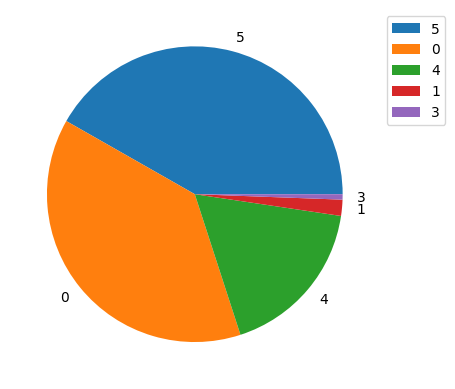

In [69]:
plt.pie(df["Rating"].value_counts() , labels = df["Rating"].unique())
plt.legend(bbox_to_anchor=(1,1))
plt.show()

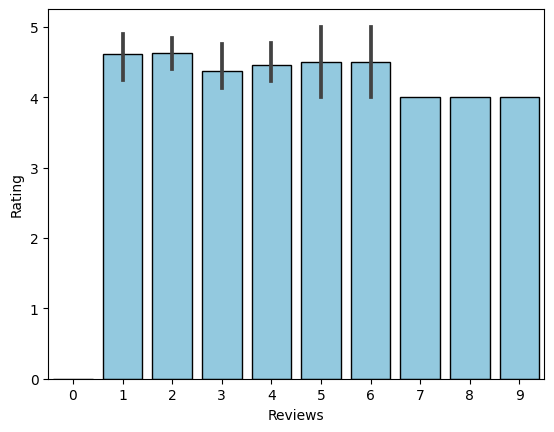

In [73]:
sns.barplot(x="Reviews", y="Rating", data=df ,  color='skyblue', edgecolor='black')
plt.show()

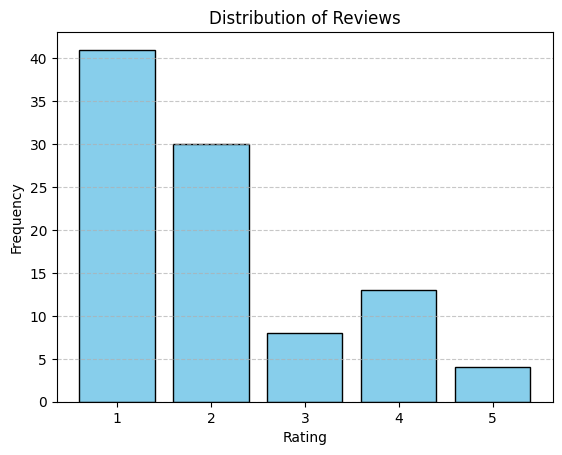

In [71]:
plt.hist(reviews, bins=range(1, 7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Set x-axis ticks to the possible rating values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

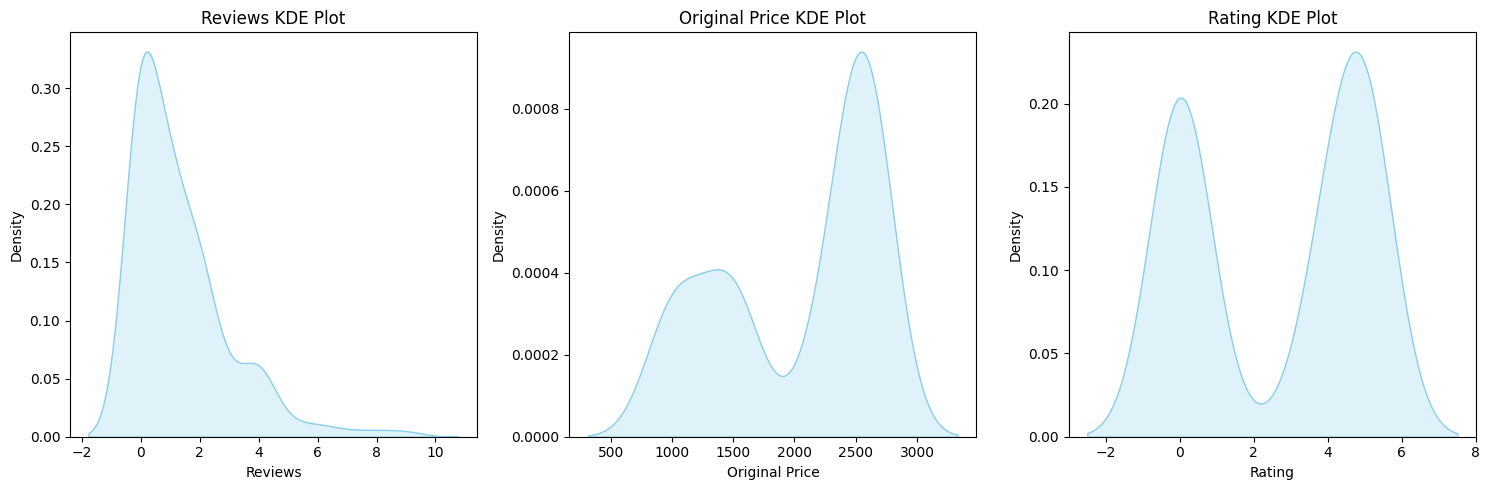

In [67]:
numerical_columns = ['Reviews', 'Original Price', 'Rating']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Creating KDE plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'{col} KDE Plot')

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

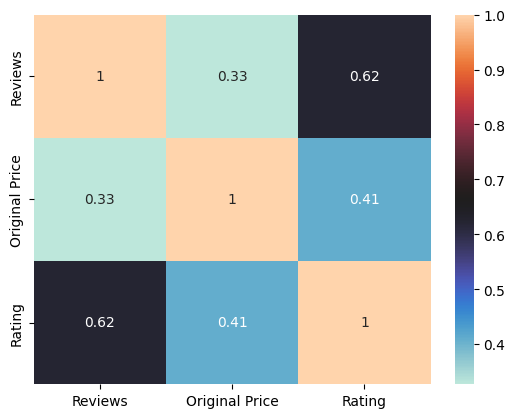

In [53]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix , annot =True ,cmap='icefire')
plt.show()

[]

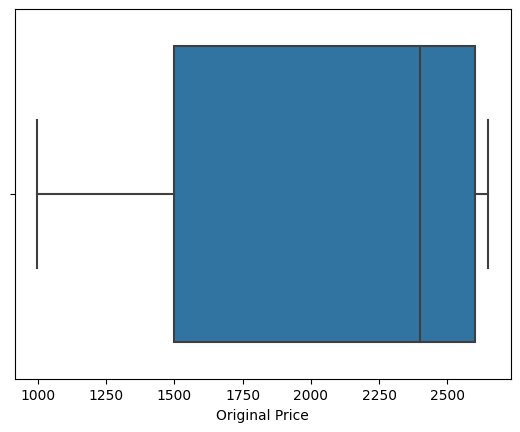

In [57]:
sns.boxplot(x="Original Price", data=df )
plt.plot()